In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Mais sobre o projeto:

https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer

In [3]:
# Lendo os dados
df = pd.read_csv('medical_examination.csv')

In [4]:
# Criando nova coluna para dizer se a pessoa está cima do peso ou não
# 1 = não e 0 = sim
df['overweight'] = df['weight'][0]/(df['height']/100)**2
df['overweight'] = df['overweight'].apply(lambda x: 1 if x>25 else 0)

In [5]:
# Normalizando as variáveis abaixo de forma que só assuma o valor de 0 ou 1
# 0 = sempre bom e 1 = sempre ruim
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x==1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x==1 else 1)

In [6]:
# Limpando possíveis outliers

df = df.drop(df[df['ap_lo']>=df['ap_hi']].index)

df = df.drop(df[df['weight']<=df['weight'].quantile(0.025)].index)
df = df.drop(df[df['weight']>=df['weight'].quantile(0.975)].index)

df = df.drop(df[df['height']<=df['height'].quantile(0.025)].index)
df = df.drop(df[df['height']>=df['height'].quantile(0.975)].index)

# Gráfico categórico

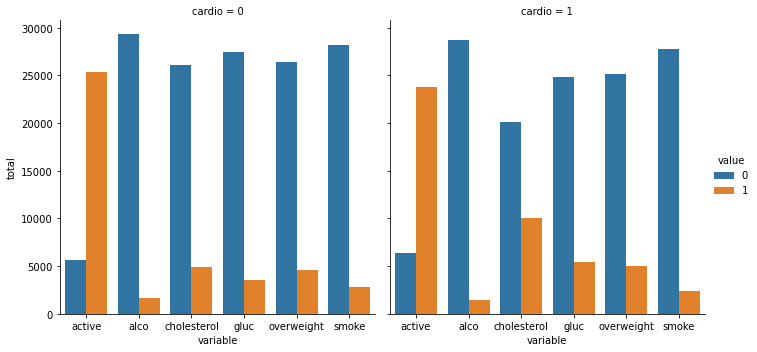

In [7]:
    df_cat = pd.melt(df,id_vars = ['cardio'], value_vars = ['cholesterol','gluc','smoke','alco','active','overweight'])
    df_cat['total'] = 1

    df_cat = df_cat.groupby(['cardio','variable','value'], as_index = False).count()

    fig = sns.catplot(x = 'variable', y = 'total', data = df_cat, hue = 'value', kind='bar', col = 'cardio').fig

    fig.savefig('catplot.png')

# Correlação entre as variáveis

<AxesSubplot:>

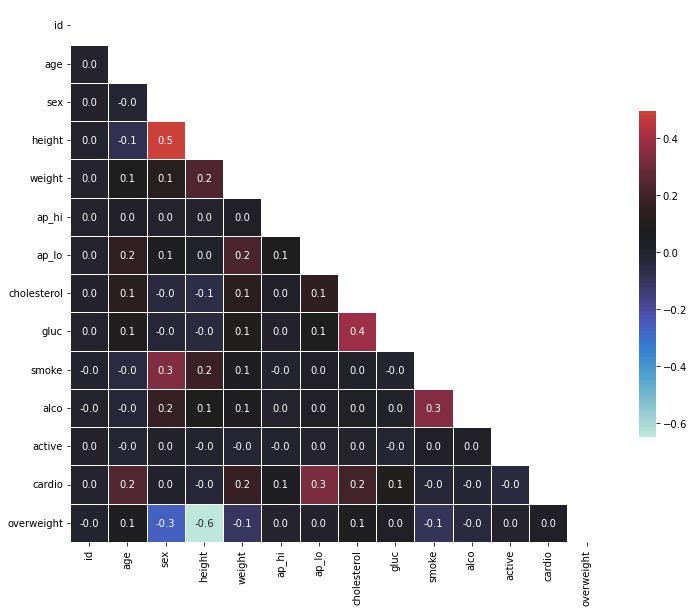

In [10]:
df_heat = df[['id','age','sex','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio','overweight']]

# Calculate the correlation matrix
corr = df_heat.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12))
fig.subplots_adjust(hspace=.5,wspace=1.35)

sns.heatmap(corr,mask=mask,linewidths=1,annot=True,square=True,fmt=".1f",ax=ax,center=0.08,cbar_kws={"shrink":0.5})